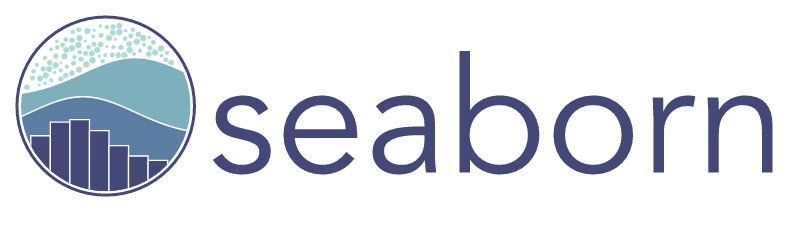

На уроке сегодня мы познакомимся с инструментами и способами визуализации данных с помощью библиотек **matplotlib** и **seaborn**. Прежде, чем приступать непосредственно к машинному обучению, важно произвести **EDA**(Exploratory Data Analysis) - Разведочный анализ данных.

Он состоит в анализе основных свойств данных, нахождения в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

Понятие введено математиком **Джоном Тьюки**, который сформулировал цели такого анализа следующим образом:

1.   Максимальное «проникновение» в данные
2.   Выявление основных структур
3.   Выбор наиболее важных переменных
4.   Обнаружение отклонений и аномалий
5.   Проверка основных гипотез


In [1]:
# Библиотека для работы с табличными данными
import pandas as pd
# Библиотека для вычислений линейной алгебры
import numpy as np
# Библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
# Начнем с чтения csv данных
df = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
# Первые пять строк
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# Изображаем статистические отношения
## **Scatterplot** (Точечный график)

Математическая диаграмма, изображающая значения двух переменных в виде точек на декартовой плоскости.

Библиотека **seaborn** без труда принимает **pandas** DataFrame(таблицу). Чтобы изобразить отношения между двумя столбцами достаточно указать, какой стобец отоброзить по оси **x**, а какой по оси **y**

<Axes: xlabel='longitude', ylabel='latitude'>

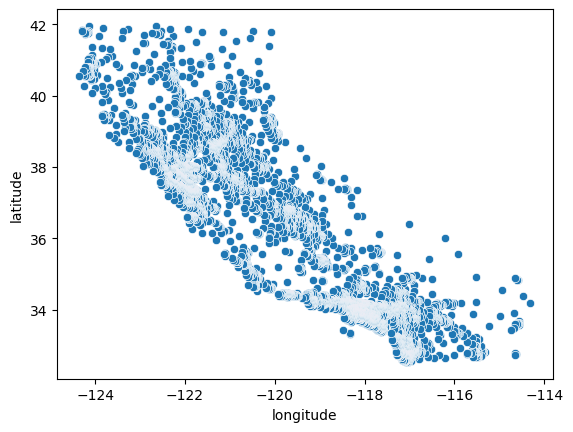

In [13]:
# Изображения точек долготы по отношению к широте.
# Можно заметить, что дома расположены в определенной "полосе" долготы и широты
# plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="longitude", y="latitude")

In [ ]:
# Самостоятельная работа №1
# Изобразите отношение households к population



Помимо двумерных отношений, мы можем добавить "дополнительное измерение" с помощью цвета. В данном случае опять же достаточно очевидное отношение, чем выше кол-во семей, тем выше кол-во людей и соответвтственно комнат

<Axes: xlabel='households', ylabel='population'>

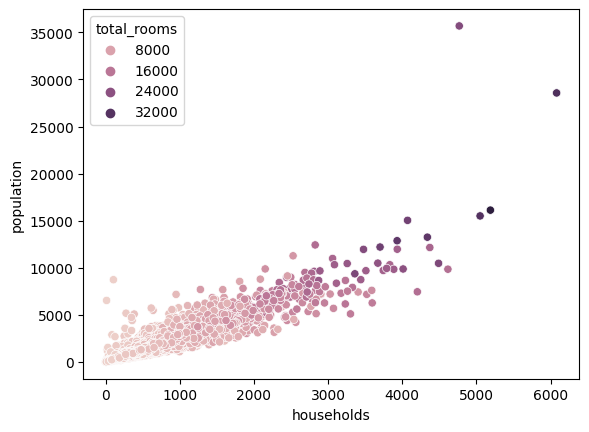

In [ ]:
sns.scatterplot(data=df, x="households", y="population",  hue="total_rooms")

Помимо обозначения дополнительного измерения цветом мы можем использовать **size**

In [ ]:
# Самостоятельная работа №2
# Добавьте total_rooms используя дополнительное измерение size


Мы можем визуализировать сразу несколько отношений используя класс **PairGrid** внутри **seaborn**

**PairGrid** принимает как аргумент pandas **DataFrame** и визуализирует все возможные отношения между ними, в соответствии с выбранным типом графика.

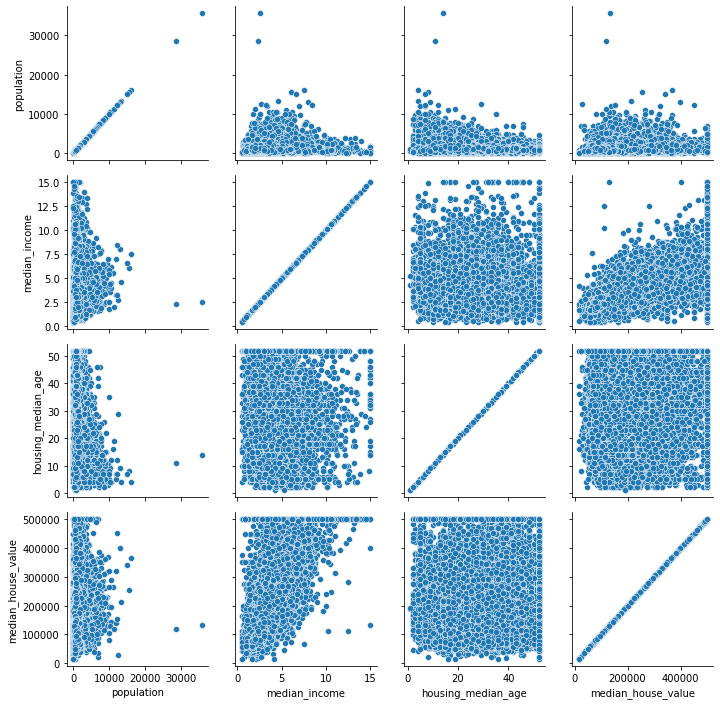

In [ ]:
cols = ['population', 'median_income', 'housing_median_age', 'median_house_value']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

<Figure size 1000x500 with 0 Axes>

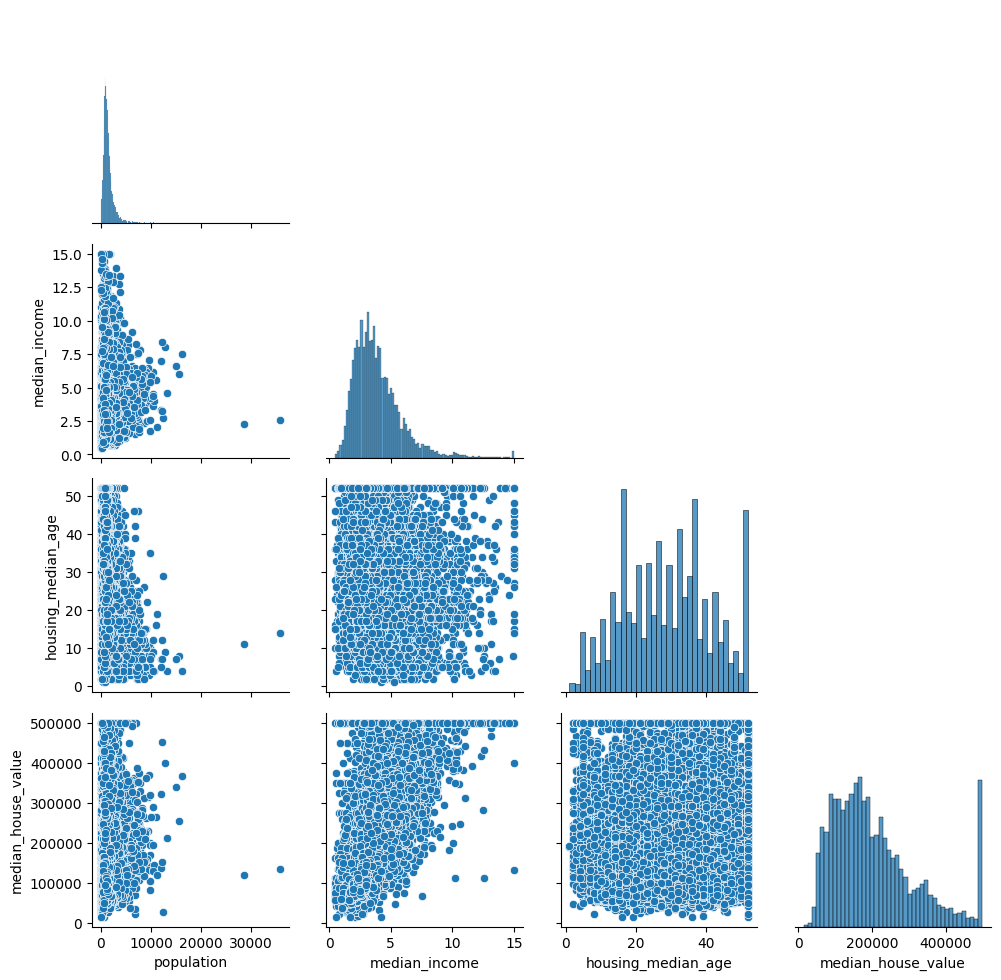

In [ ]:
cols = ['population', 'median_income', 'housing_median_age', 'median_house_value']
plt.figure(figsize=(10, 5))
g = sns.PairGrid(df[cols], corner=True)

g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Как вы думаете, чем вызвана линейная зависимость по диагонали?

## Линейные графики
Хорошо подойдут, если есть временная или кака-либо иная последовательность и значения, которые могум меняться в зависимости от неё.

Для генерации линейных графиков в **seaborn** используется **relplot** функция.
Она также принимает **DataFrame**, **x**, **y** - столбцы.

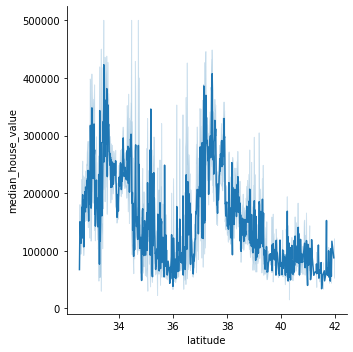

In [ ]:
# Для визуализации выбирается тип line
sns.relplot(x="latitude", y="median_house_value", kind="line", data=df)

Можно видеть, что в определеных местах долготы цена за дома резко подскакивает

In [ ]:
# Самостоятельная работа №3
# Визуализировать longitude по отношения к median_house_value
# Используя линейный график

Можно видеть, что в определеных местах широты цена за дома также очень высока

Используя точечный график можно визуализировать эти отношения с большей четкостью. Скорее всего резкий рост цен связан с близостью к ценному объекту, повышающему качество жизни, скорее всего побережью океана или реки.

<Axes: xlabel='latitude', ylabel='longitude'>

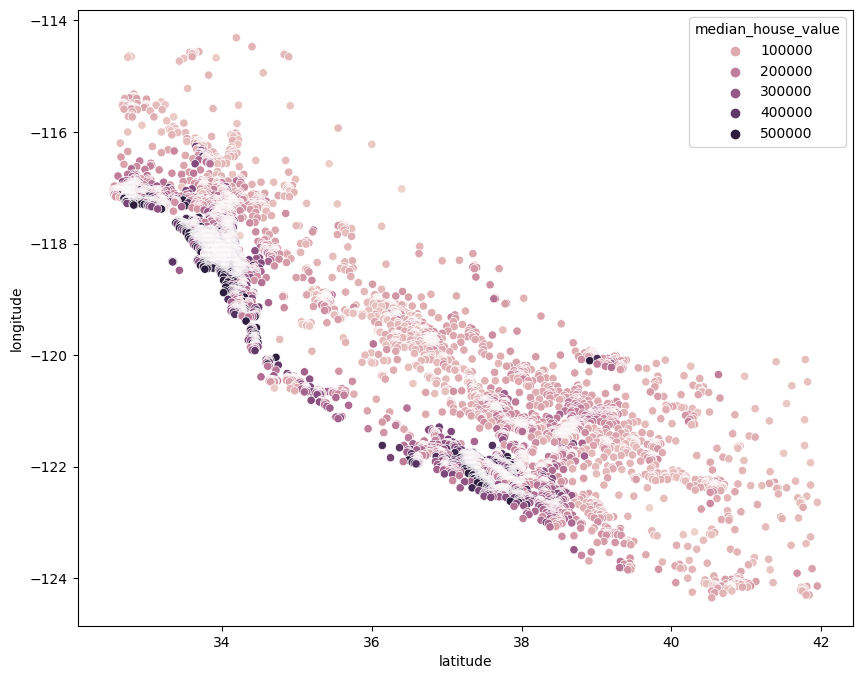

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="latitude", y="longitude",  hue="median_house_value")

# Гистограмма
Способ представления табличных данных в графическом виде — в виде столбчатой диаграммы. По оси **x** обычно указывают значение, а по оси **y** - встречаемость(кол-во таких значений в выборке)

<Axes: xlabel='median_income', ylabel='Count'>

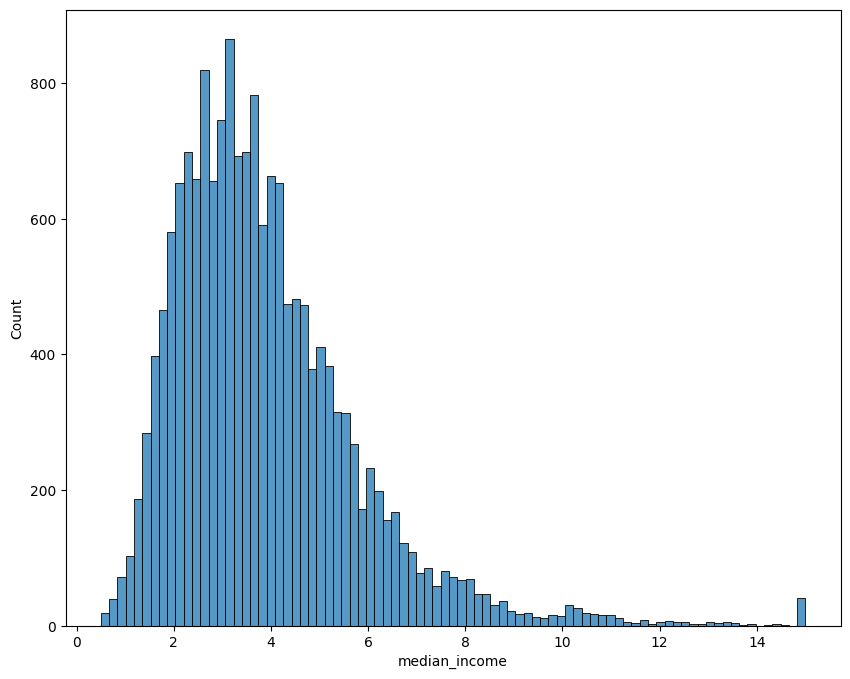

In [15]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="median_income")

Можно видеть что у большинства семей доход находится между значениями 2 и 6.
И только очень небольшое ко-во людей обладают доходом > 10

In [ ]:
# Самостоятельная работа №5
# Изобраить гистограмму по housing_median_age


Распределение по возрасту более равномерное. Большую часть жителей составляют люди в возрасте от 20 до 40 лет. Но и молодежи не мало. Также очень много пожилых людей > 50 лет медианный возраст.

Давайте посмотрим медианный доход у пожилых жителей

<Axes: xlabel='median_income', ylabel='Count'>

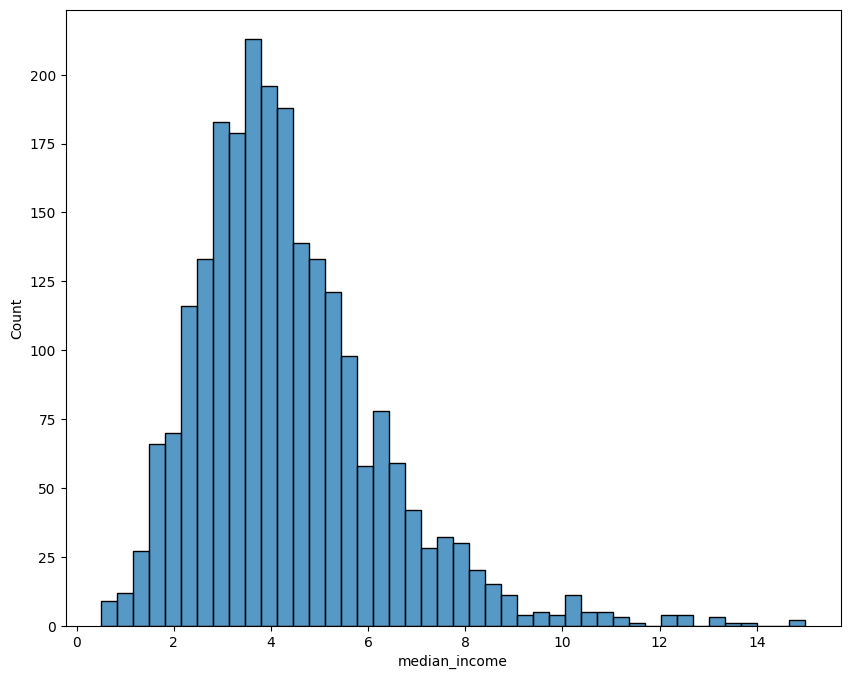

In [16]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df[df['housing_median_age']<15], x="median_income")

Большого отличия от популяции в целом не наблюдается. Скорее всего это местные жители.

Давайте посмотрим на популяцию

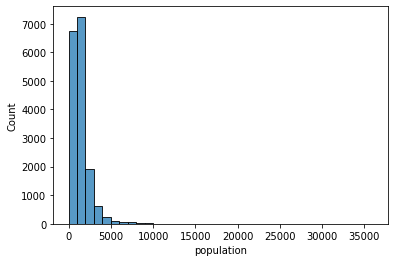

In [ ]:
sns.histplot(data=df, x="population", binwidth=1000)

Разобьем возрастные группы на 3 категории те кто моложе 20 лет, от 20 до 50 и от 50, чтобы посмотреть влияет ли это на доход.

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.loc[df['housing_median_age'] <= 20, 'age_group'] = 'Молодые'
df.loc[(df['housing_median_age'] > 20) & (df['housing_median_age'] <= 50), 'age_group'] = 'Ср. возраст'
df.loc[df['housing_median_age'] > 50, 'age_group'] = 'Пожилые'

In [ ]:
df.head(30)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age_group
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,Молодые
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,Молодые
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,Молодые
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,Молодые
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,Молодые
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,Ср. возраст
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,Ср. возраст
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,Ср. возраст
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,Ср. возраст
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,Ср. возраст


Применим group_by, чтобы получить среднее значение
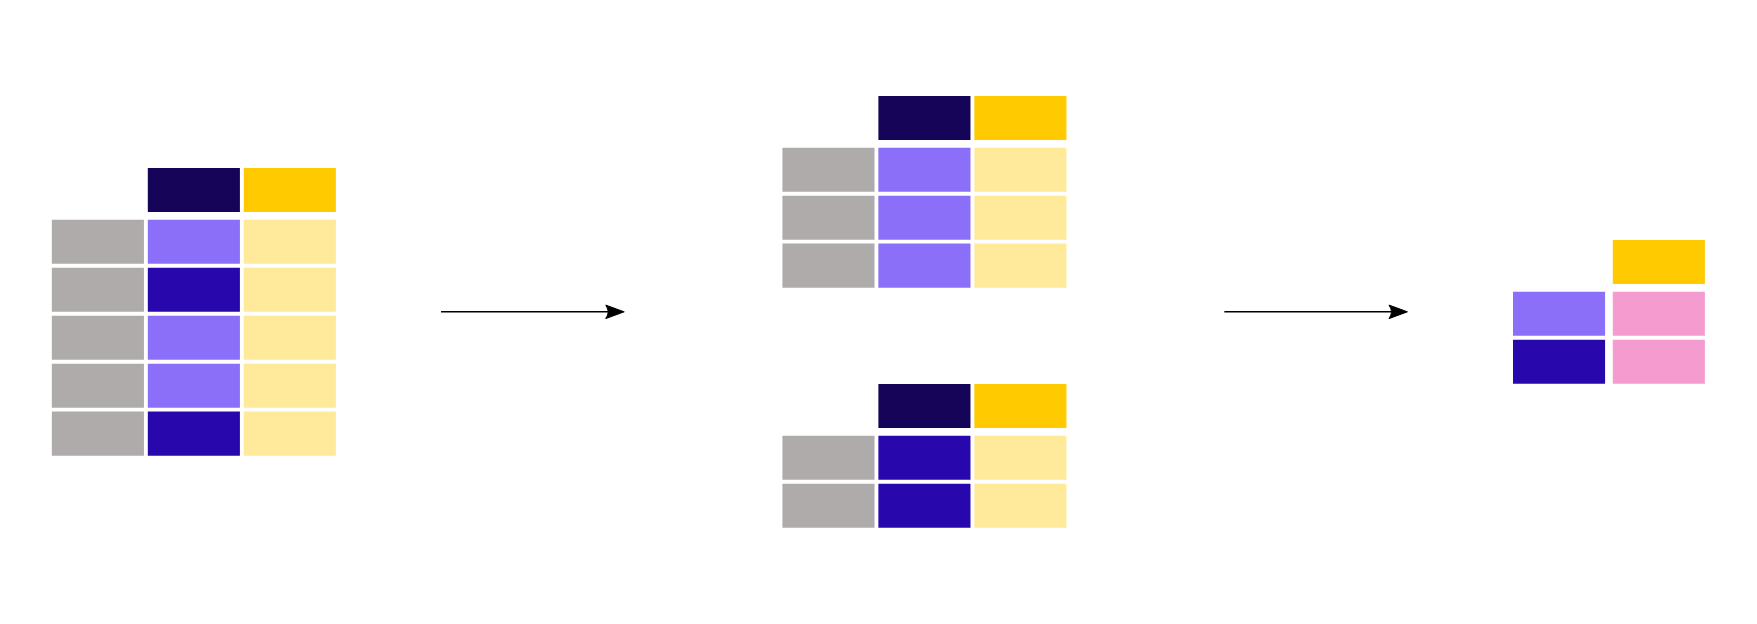

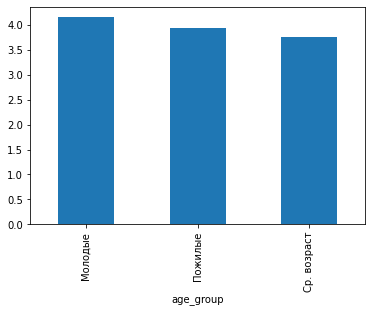

In [ ]:
df.groupby('age_group')['median_income'].mean().plot(kind='bar')

Молодые оказываются самой богатой группой населения. Но отличие в доходе не значительное.

**Seaborn** так же позволяет нам смотреть распределение по многим параметрам.
Давайте поделим группы по доходам на 2. Те у кого медианный доход выше 6 и те у кого меньше. Изобразим дополнительное измерение с помощью оттенка в виде возрастных групп и групп по доходам.


In [ ]:
df.loc[df['median_income'] > 6, 'income_group'] = 'rich'
df.loc[df['median_income'] < 6, 'income_group'] = 'everyone_else'

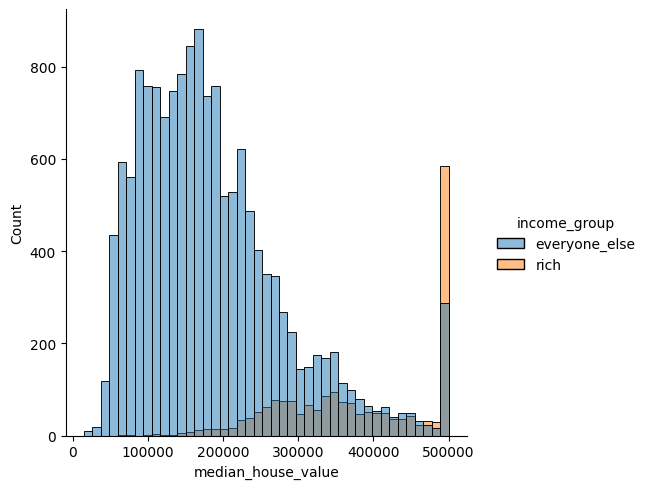

In [ ]:
sns.displot(df, x="median_house_value", hue="income_group")

In [ ]:
# Самостоятельная работа
# Изобразить гистограмму по median_house_value с оттенком age_group

# Heatmaps(Корелляция)
Посмотрим как данные коррелируют между собой.

In [4]:
corr = df.corr()

<Axes: >

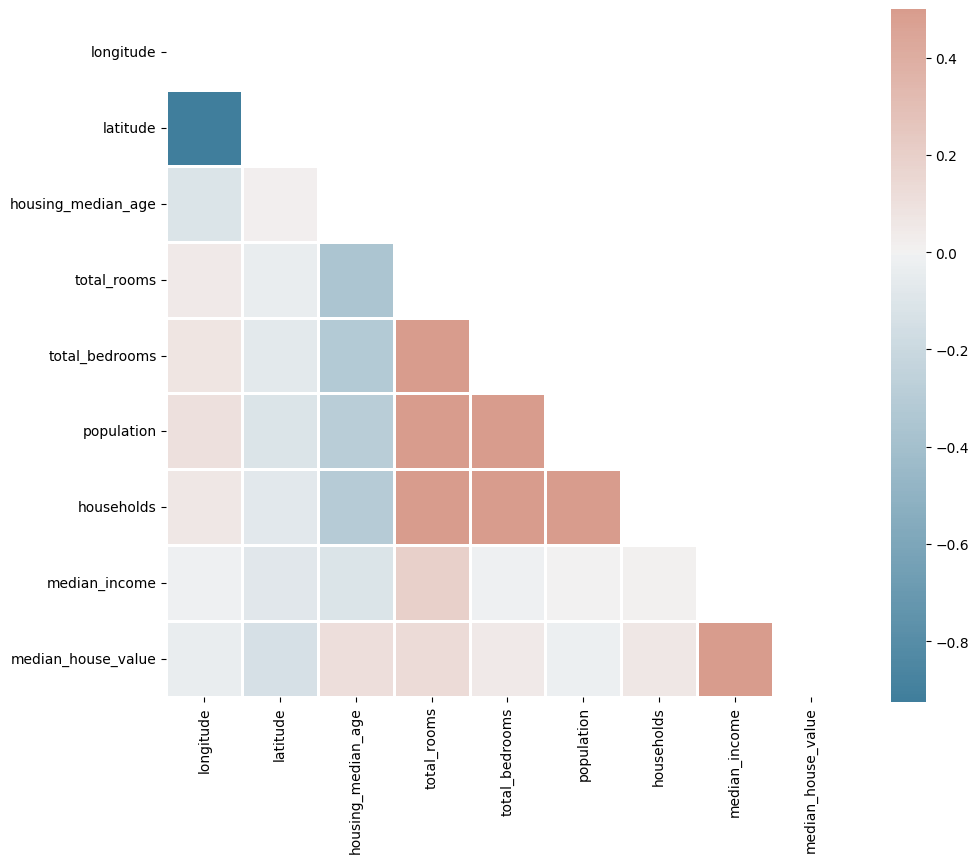

In [11]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize=(11, 9))

# Создаем цветовую политру
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Визуализируем данные кореляции
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": 1})

# Выводы

Анализ данных должен предоставлять информацию и инсайт, которые не видные невооруженным взглядом. В этом и есть красота аналитики. В данном случае можно сделать следующий выводы. Стоимость домов напрямую зависит от их расположения, в определенной полосе(скорее всего побережье) цена на дома высокая. Чем выше доход, тем больше шанс, что человек проживает в богатом районе. Возраст никак не коррелирует с доходом. Распределение по возрастам примерно одинаковое во всех группах доходов. Ну и из очевидно чем больше людей, тем больше семей, и соответственно комнат и спален.

# Самостоятельная работа
Написать **EDA** для датасета про пингвинов

### Необходимо:


*   Использовать 2-3 точечных графика
*   Применить доп измерение в точечных графиках, используя аргументы **hue**, **size**, **stile**
*   Использовать **PairGrid** с типом графика на ваш выбор
*   Изобразить **Heatmap**
*   Использовать 2-3 гистограммы




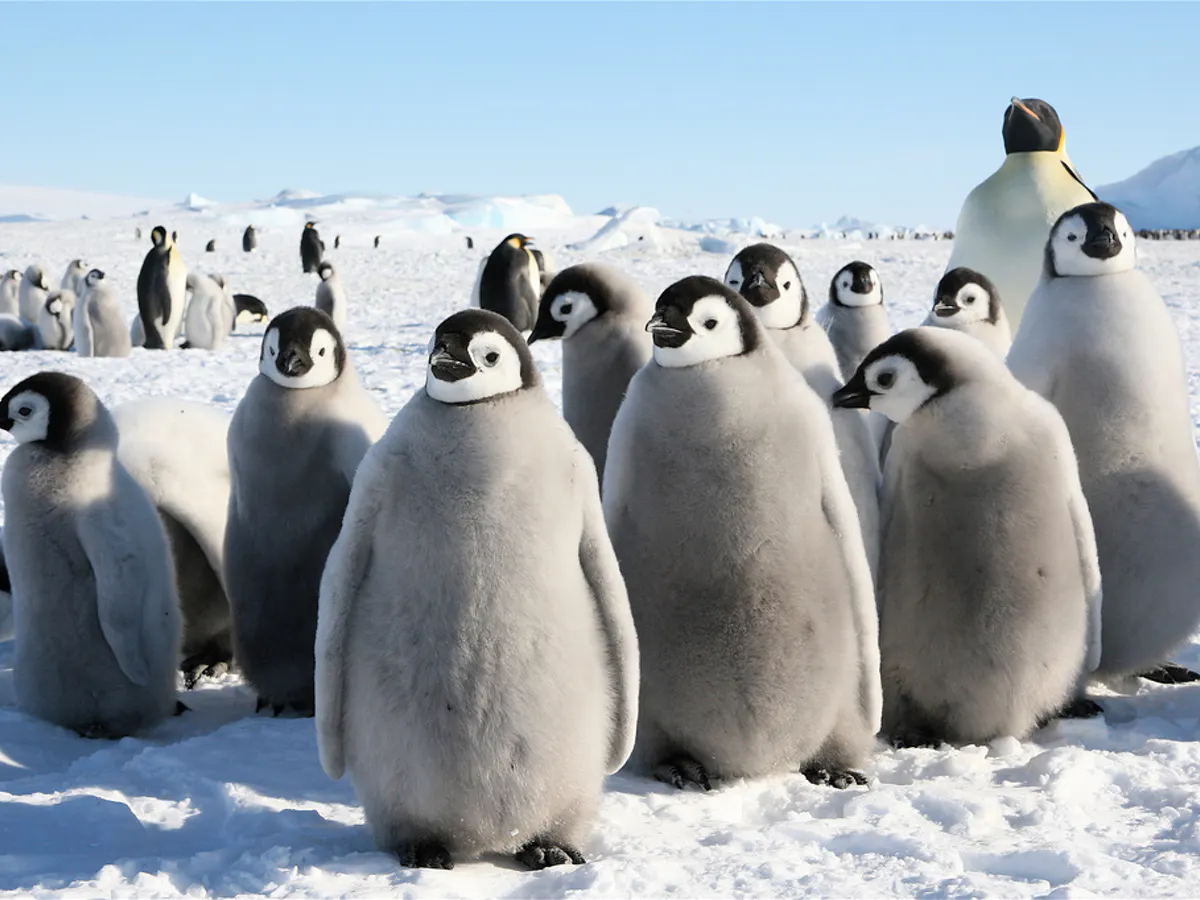

In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
p = sns.load_dataset("titanic")

In [ ]:
p.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df1 = p.loc[p['survived'] == 1, ['sex']]

In [ ]:
df1.head(20)

,sex
1,female
2,female
3,female
8,female
9,female
10,female
11,female
15,female
17,male
19,female


In [ ]:
penguins1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Первые 5 строк датасета про пингвинов
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
